In [10]:
from os import path

f_in = open("Genus_group_name_WORKING.txt","r")

Lines = f_in.readlines()
Lines = sorted(Lines)
f_in.close()

count=0
summa_rata=[]
for line in Lines:
    tp=0
    fp=0
    count+=1
    
    
    if count%400==0:
        print(str(count)+" / "+ str(len(Lines)))
    
    ide="SAM/"+line[:-1]+"_reads.fasta_SAM.sam"
            
    if path.exists(ide) ==False:
        print("Path does not exist:" +"+line[:-1]")
        
    else:
        sam_file=open(ide,'r')
        sam=sam_file.readlines()
        sam_file.close()
            
        for result in sam:
            res = result.split('	')
            if res[0].split('|')[0] == res[2]:
                tp+=1         
            else:
                fp+=1
        
        summa_rata.append((line[:-1],tp,fp))
print(len(summa_rata))

Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
400 / 3269
800 / 3269
Path does not exist:+line[:-1]
1200 / 3269
1600 / 3269
2000 / 3269
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
2400 / 3269
2800 / 3269
Path does not exist:+line[:-1]
3200 / 3269
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
3254


In [13]:
file_out=open("fp_tp_rata.txt",'w')

for rata in summa_rata:
    file_out.write(rata[0]+" "+str(rata[1])+" "+str(rata[2])+"\n")
    
file_out.close()

3254


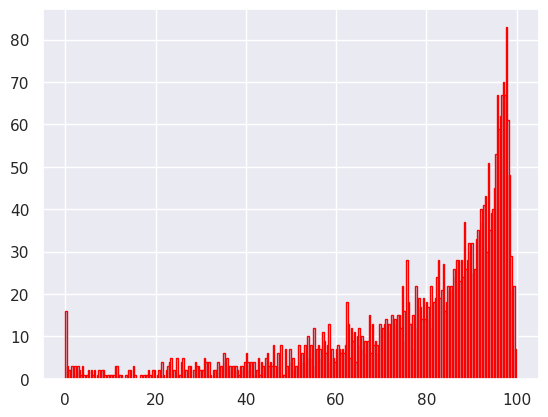

In [137]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


x_=[]
for r in range(0,len(occ)-1):
    x_.append(r)


occ=[]
for rata in summa_rata:
    f= rata[2]/(rata[1]+rata[2])*100
    occ.append(f)


plt.hist(occ[:], bins=300,color = "lightblue", ec="red")
print(len(occ))

3254


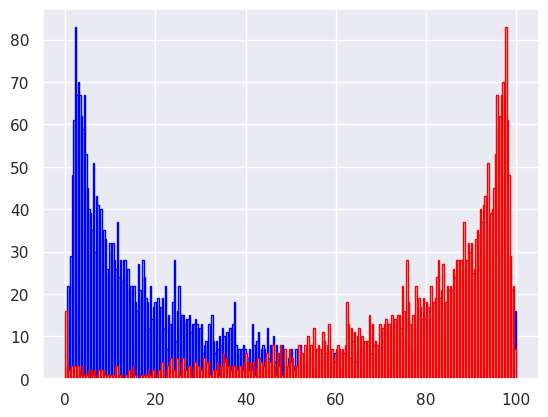

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


x_=[]
for r in range(0,len(occ)-1):
    x_.append(r)


occ_=[]
for rata in summa_rata:
    f= rata[1]/(rata[1]+rata[2])*100
    occ_.append(f)

plt.hist(occ_[:], bins=300,color = "lightblue", ec="blue")
plt.hist(occ[:], bins=300,color = "lightblue", ec="red")


print(len(occ))

In [135]:
from Bio import SeqIO
from Bio.Seq import Seq
import operator
import math
import numpy

import Bio

from os import path

f_in = open("Genus_group_name_WORKING.txt","r")

Lines = f_in.readlines()
Lines = sorted(Lines)
f_in.close()

count=0
align_inGenus=[]
for line in Lines:
    all_reads_involved=True
    tp=0
    fp=0
    SameGenus=0
    count+=1
    
    
    #if count%500==0:
     #   print("vége")
      #  break
    if count <=71:
        continue
    if count%30 ==0:
        print(count)
        
    
    ide="SAM/"+line[:-1]+"_reads.fasta_SAM.sam"
            
    if path.exists(ide) ==False:
        print("Path does not exist:" +"+line[:-1]")
        
    else:
        sam_file=open(ide,'r')
        sam=sam_file.readlines()
        sam_file.close()
        
        count_cancel=0
        for result in sam:
            count_cancel+=1
            
            if count_cancel >=150000:
                all_reads_involved=False
                break
            
            change =False
            prev = result
            res = result.split('	')
            if res[0].split('|')[0] == res[2]:
                tp+=1
                change=True
                
            else:
                check = res[2] 
                
                ide_path="/home/csado7/biobox/csado7/MSA_score/Taxonomy_Genus_Just_Bacteria/"+line[:-1]+".fasta"
                if path.exists(ide_path) ==False:
                    print("Patho does not exist. -> "+line[:-1])
                
                
                with open(ide_path) as input_handle:
                    for record in SeqIO.parse(input_handle, "fasta"):
                        count_cancel+=1
                        
                            
                        if check == str(record.description.split(' ')[0]):
                            change=True
                            SameGenus+=1
                
            
            if change ==False:
                fp+=1
        if all_reads_involved:
            align_inGenus.append((line[:-1],tp,fp,SameGenus))
print(len(align_inGenus))

file_out=open("fp_tp_rata_inGenus_150k.txt",'w')

for rata in align_inGenus:
    file_out.write(rata[0]+" "+str(rata[1])+" "+str(rata[2])+" "+str(rata[3])+"\n")
file_out.close()

90
120
150
180
210
240
270
300
Path does not exist:+line[:-1]
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
Path does not exist:+line[:-1]
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380
1410
1440
1470
1500
1530
1560
1590
1620
1650
1680
1710
1740
1770
1800
1830
1860
1890
1920
1950
1980
2010
Path does not exist:+line[:-1]
2040
Path does not exist:+line[:-1]
2070
2100
2130
2160
2190
2220
2250
2280
2310
2340
2370
2400
2430
2460
2490
2520
2550
2580
2610
2640
2670
2700
2730
2760
2790
2820
2850
2880
2910
2940
2970
3000
3030
3060
3090
Path does not exist:+line[:-1]
3120
3150
3180
3210
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
3240
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
Path does not exist:+line[:-1]
1287


(array([231.,  51.,  44.,  44.,  50.,  51.,  27.,  46.,  26.,  46.,  34.,
         30.,  25.,  21.,  20.,  21.,  20.,  27.,  25.,  19.,  23.,  14.,
         24.,  16.,  25.,  14.,  16.,  16.,  20.,  21.,  14.,  17.,  15.,
          9.,   9.,   8.,   7.,   8.,   7.,   9.,   4.,   8.,   7.,   3.,
         14.,   7.,   8.,  11.,   5.,   3.,   7.,   6.,   9.,   5.,   4.,
          1.,   3.,   3.,   3.,   2.,   1.,   4.,   3.,   1.,   2.,   2.,
          1.,   4.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.]),
 array([ 0.        ,  1.07386234,  2.14772468,  3.22158702,  4.29544936,
         5.3693117 ,  6.44317404,  7.51703638,  8.59089872,  9.66476106,
        10.7386234 , 11.81248574, 12.88634808, 13.96021042, 15.03407276,
        16.1079351 , 17.18179745, 18.25565979, 19.32952213, 20.40338447,
        21.47724681, 22.55110915, 23.62497149, 24.69883383, 25.77269617,
        26.84655851, 27.92042085, 28.99428319, 30.06814553, 31.14200787,
        32.21587

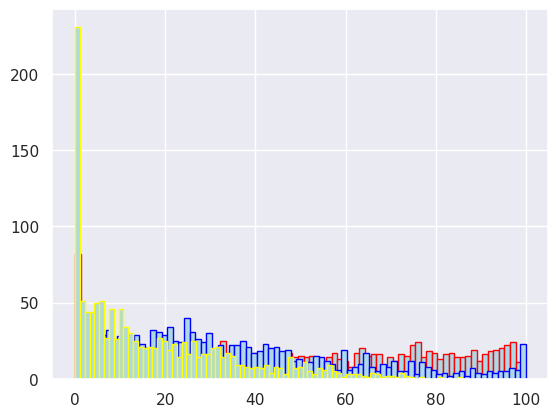

In [136]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


x_=[]
for r in range(0,len(align_inGenus)-1):
    x_.append(r)


occ=[]
occ_y=[]
occ_Genus=[]
for rata in align_inGenus:
    f = rata[2]/(rata[1]+rata[2]+rata[3])*100
    g = rata[1]/(rata[1]+rata[2]+rata[3])*100
    h = rata[3]/(rata[1]+rata[2]+rata[3])*100
    occ.append(f)
    occ_y.append(g)
    occ_Genus.append(h)

#false pos
plt.hist(occ[:], bins=80,color = "lightblue", ec="red")

#true pos
plt.hist(occ_y[:], bins=80,color = "lightblue", ec="blue")

#inGenus
plt.hist(occ_Genus[:], bins=80,color = "lightblue", ec="yellow")



In [131]:
print("asd")

asd


(array([176.,  21.,  12.,  17.,  17.,  14.,  23.,  14.,  13.,  10.,  17.,
         13.,   8.,  18.,  10.,  11.,  12.,  10.,  11.,   6.,  10.,   5.,
          8.,   5.,   3.,   6.,  14.,  10.,   5.,   6.,  12.,   7.,   3.,
          7.,   3.,   9.,   7.,   7.,   4.,   4.,   6.,   3.,   5.,   9.,
          6.,   4.,   6.,   7.,   4.,   7.,   3.,   1.,   3.,   1.,   1.,
          2.,   1.,   2.,   2.,   2.,   1.,   3.,   4.,   1.,   0.,   3.,
          1.,   0.,   2.,   0.,   2.,   2.,   0.,   0.,   0.,   2.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.        ,  0.72249625,  1.44499249,  2.16748874,  2.88998499,
         3.61248124,  4.33497748,  5.05747373,  5.77996998,  6.50246622,
         7.22496247,  7.94745872,  8.66995496,  9.39245121, 10.11494746,
        10.83744371, 11.55993995, 12.2824362 , 13.00493245, 13.72742869,
        14.44992494, 15.17

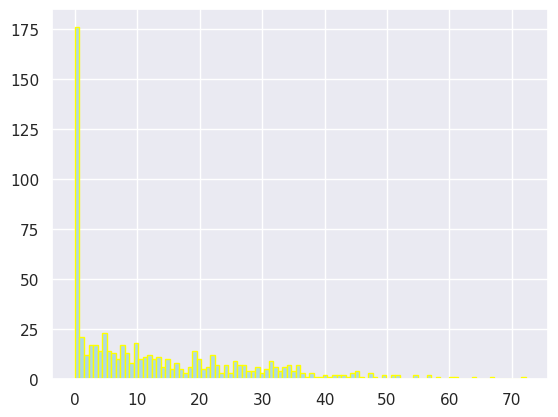

In [127]:
plt.hist(occ_Genus[:], bins=100,color = "lightblue", ec="yellow")

In [94]:
file_out=open("fp_tp_rata_inGenus_1_69kb.txt",'w')

for rata in align_inGenus:
    file_out.write(rata[0]+" "+str(rata[1])+" "+str(rata[2])+" "+str(rata[3])+"\n")
file_out.close()